In [1]:
%load_ext autoreload
%autoreload 2
import cmcrameri.cm as cm  # Importing the cmcrameri colormaps
%run pf_data.py '../pflo_revisions/hydrothermal.nc'

Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Prehnite', 'Talc', 'Quartz', 'Saponite_Mg', 'Zoisite', 'Chamosite', 'Clinochlore', 'Analcime', 'Anhydrite', 'Calcite', 'Annite']
Primary mineral groups: {'olivine': ['Forsterite', 'Fayalite'], 'clinopyroxenes': ['Diopside', 'Hedenbergite'], 'plagioclases': ['Anorthite', 'Albite']}
Secondary mineral groups: {'clays': ['Saponite_Mg', 'Chamosite', 'Clinochlore'], 'zeolites': ['Analcime'], 'amphiboles': ['Tremolite'], 'inosilicates': ['Prehnite'], 'talc': ['Talc'], 'epidotes': ['Zoisite'], 'sulfates': ['Anhydrite'], 'carbonates': ['Calcite'], 'quartz': ['Quartz'], 'mica': ['Annite']}


In [2]:
# Parameters
basecase = 4
time = 1000

pf_data = pf_data.sel(file_number=basecase)

/tmp/ipykernel_26275/3677210794.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(y_ticks[::-1])


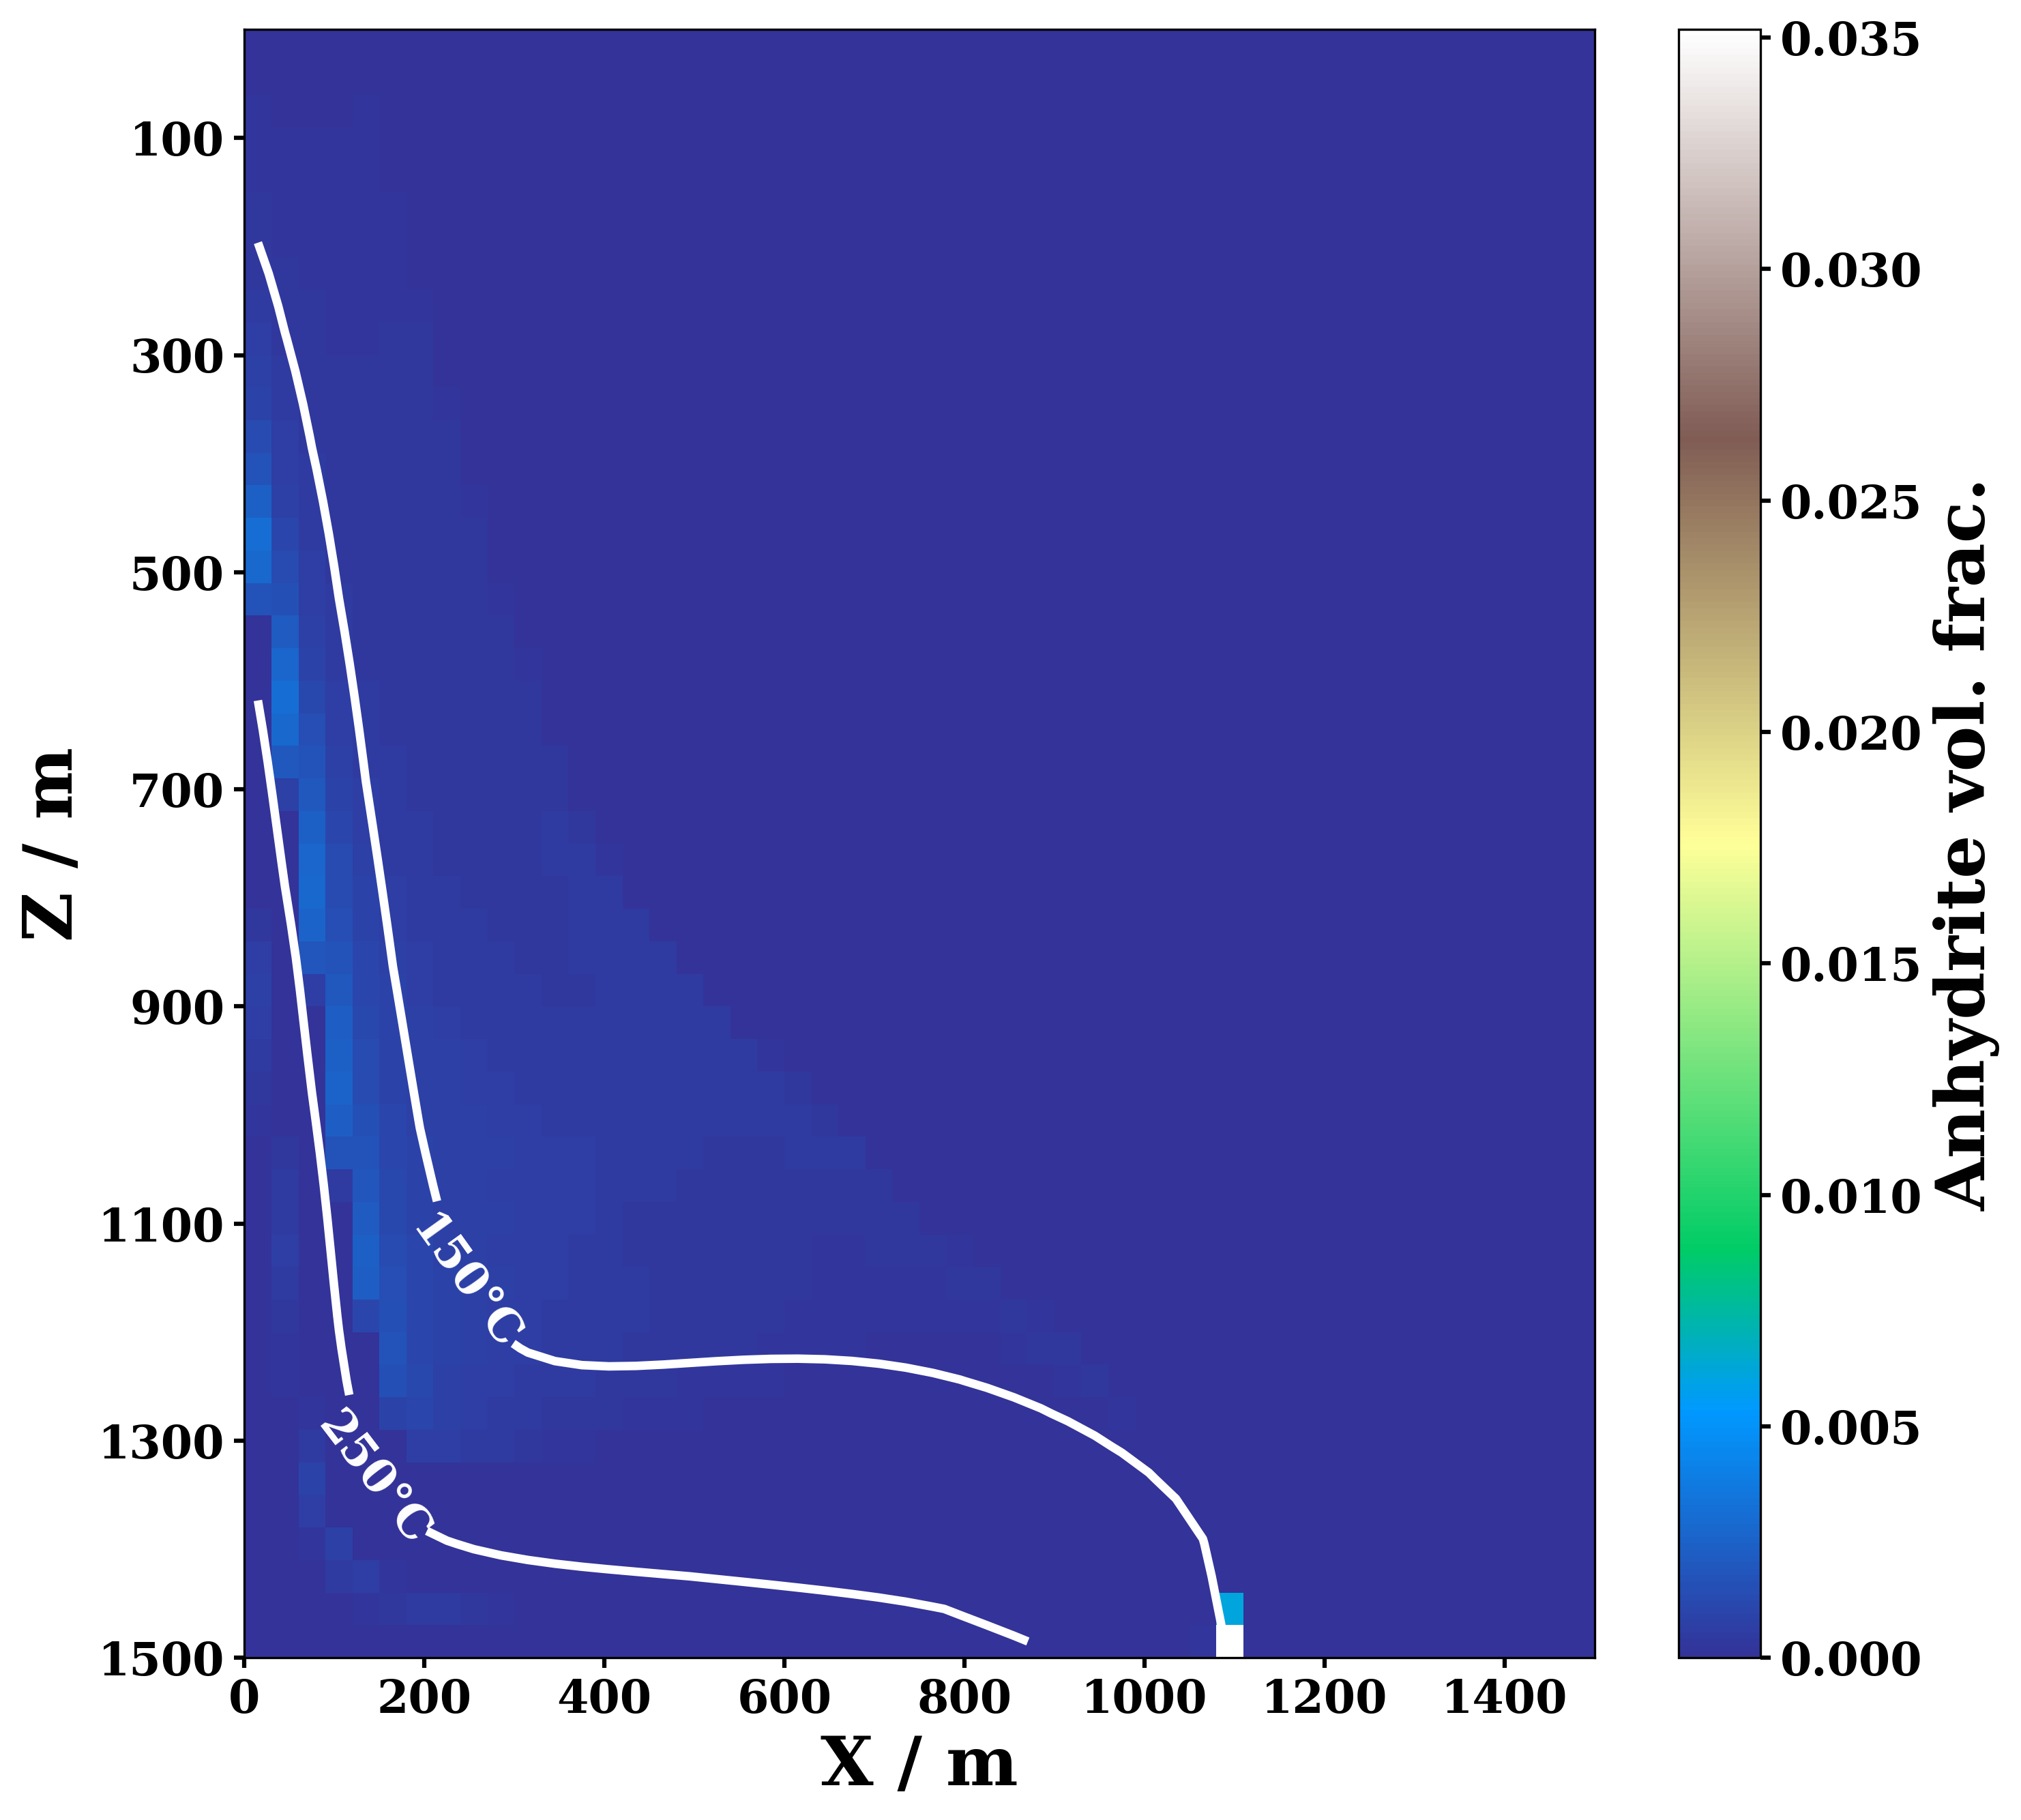

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cmcrameri.cm as cm
import figures as figs

# Set custom style and font size
plt.style.use('custom.mplstyle')
fontsize = 24

# Create a figure with 1 row and 2 columns, specific figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax = [ax]

# Add temperature contours at 150°C, 250°C, 450°C with white color
temperature_data = pf_data['Temperature'].sel(time=time, method='nearest').squeeze().T
contour_levels = [150, 250, 450]  # Temperature levels in °C
contours = ax[0].contour(
    pf_data['x'], pf_data['z'], temperature_data, 
    levels=contour_levels, 
    colors='white', 
    linewidths=3
)

# Add contour labels
ax[0].clabel(contours, inline=True, fontsize=16, fmt='%d°C')

# PF alteration plot
mesh = ax[0].pcolormesh(pf_data['x'], pf_data['z'], 
                        pf_data['Anhydrite_VF'].sel(time=time).squeeze(), 
                        cmap='terrain', shading='auto')
ax[0].set_xlabel('X / m', fontsize=fontsize)
ax[0].set_ylabel('Z / m', fontsize=fontsize)

# Get the current y-ticks
y_ticks = [100, 300, 500, 700, 900, 1100, 1300, 1500]
# Set the y-ticks with reversed labels
ax[0].set_yticklabels(y_ticks[::-1])

# Add colorbar to the first axis
cbar = fig.colorbar(mesh, ax=ax[0])
cbar.set_label('Anhydrite vol. frac.', fontsize=fontsize)

# Adjust layout and save the figure
fig.tight_layout()
fig.savefig('output/figure_4.png', dpi=300)
